### Titanic : Machine Learning From Disaster

##### Importing Libraries

First import all the required library for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This load the dataset 
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

##### This shows that their are are 891 rows and 12 columns in the data

In [4]:
# loading the test set and checking the first few rows
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

###### In the test set their are 418 rows and 11 colunms

In [6]:
# checking the features in the dataset
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# checking for features with missing non values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# displaying the rows with missing value
pd.set_option('display.max_rows', None)
train[train.isnull().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.00,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.00,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S


* The cabin has 78% of missing value
* The Age has 20% missing value
* The Embarked has less then 1% missing value.

In [9]:
# checking the number of missing  values in the test set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# checking for missing values in the test set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# checking the data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# checking the sumary statictis for categorical features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lesurer, Mr. Gustave J",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [15]:
# thesummary statistics for the numerical variable
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




## Visualization of the features in train set

* Univarate analysis : this allows us to understand the               distribution of each features

* Bivarate analysis : This allows us to check two features if there is  any useful relationship

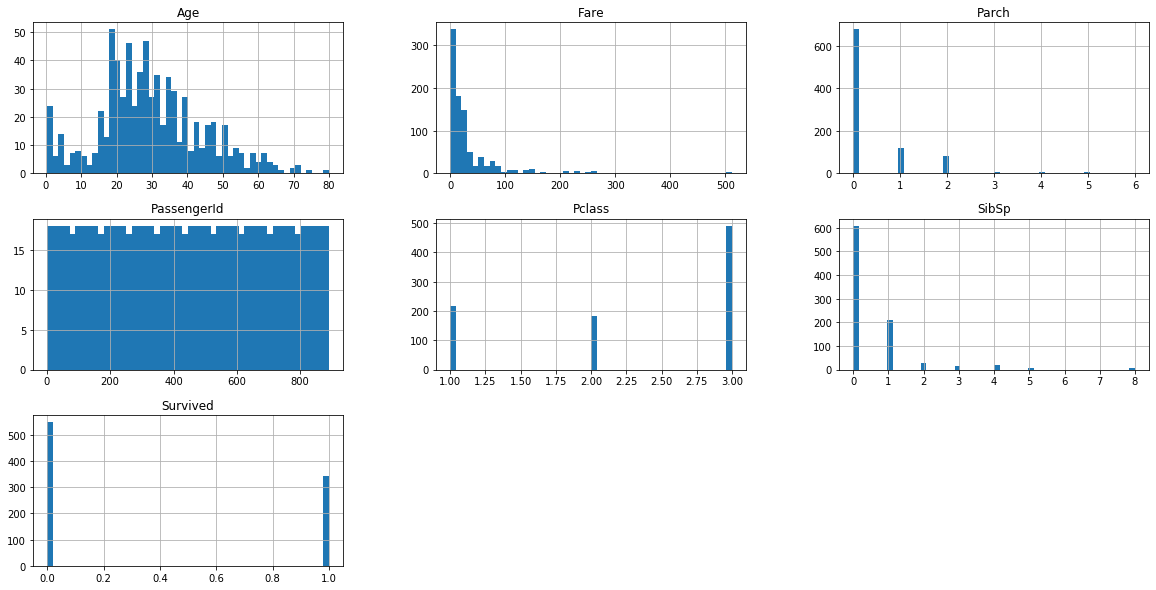

In [16]:
# checking the distribution of the numerical features
train.hist(bins=50, figsize=(20,10))
plt.show()

###### Observations from the plotting the distribution of the  numerical features -
* fare appears to be skew to the right - 
* Age appears to have his value distributed -
* Survived, Pclass, has a discrete interval and hence should be categorical instead of numerical.
* The passengerid did not give meaningful information.
* SibSp and Parch appears to be ordinal categorical features.

In [17]:
# checking the coeffiecient of skew
train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

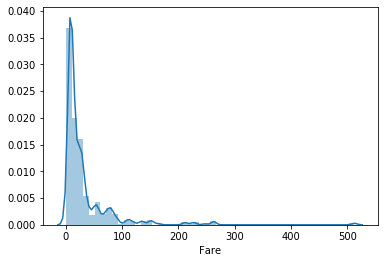

In [18]:
sns.distplot(train.Fare)

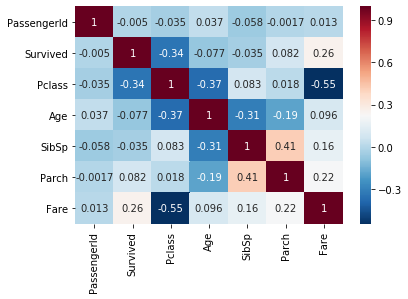

In [19]:
#plt.figure(figsize=(10,8))
# Plot heatmap of annotated correlations
correlations = train.corr()
correlations = correlations
sns.heatmap(correlations,cmap='RdBu_r', annot=True)

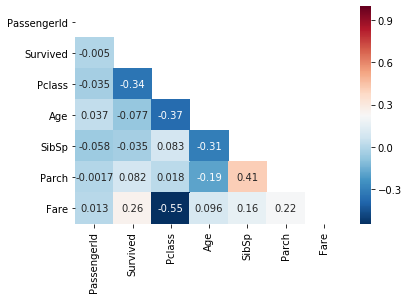

In [20]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(correlations,cmap='RdBu_r', annot=True,mask=mask)

###### Their appears to be linear relationship among some features
* Parch and Sibsp- shows positive correlation
* Survived and fare- shows is a positive correlation
* Age and Pclass shows negatve correlation
* fare and Pclass - shows  negative correlation
* Pclass and Survived



## Bivarate analysis
This involves examining the relationship between two features.
* Let Analyse this relationship by Pivoting the two Features 

In [21]:
# checking the relationship between the passengers class and survived
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* The above shows that passengers in Pclass 1 has a higher survival rates compare to passengers in other class.

In [22]:
# let see the relationship between the sex and  Survived
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


* The above shows that females passengers has a high survival rate than the males. the females survival rates is  74% while the male is 18%. Thus this implies more females survived the ship.

In [23]:
# Let see the relationship between SibSp and Survived
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


* from the above table, their seems to be no consistent truth relationship between the SibSp and Survived

In [24]:
# let see the relationship between Parch and Survived
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


* from the above their is not a clear cut relationship between Parch and Survived.


## Performing Multivariate analysis 
it involves checking the relation between three or more features at once.
* This will be achieve by visualization.

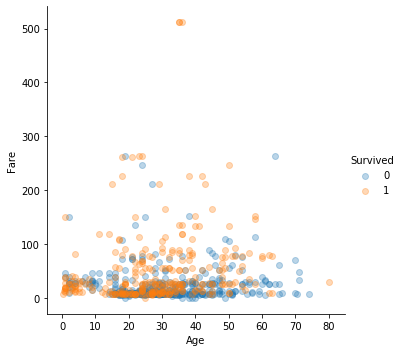

In [25]:
# relationship between Age, fare and survived
sns.lmplot(x='Age',y='Fare',hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha':0.3})
plt.show()

##### Observation:
* The higher the fare the  higher the survival rate irrespective of the Age.

* The oldest passenger survived

* The passenger that paid the highest Fare survived

/home/lawani/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/lawani/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


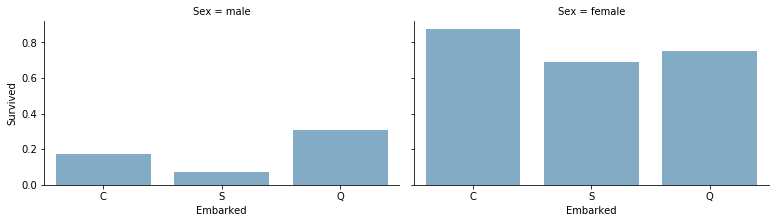

In [26]:
# the relationship between Sex, Embarked, Survived
grid = sns.FacetGrid(train, col ='Sex', size = 3.2, aspect =1.7)
grid.map(sns.barplot, 'Embarked','Survived', alpha= 0.6, ci = None)

* This tells us that no matter the embarked class the females has high  survival rate than males.


###### Let see the relationship between Age and Survived by looking at a plot of there distribution

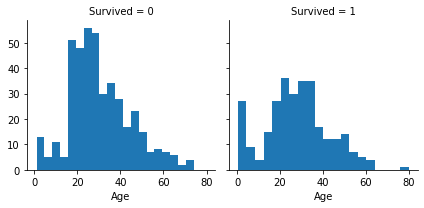

In [27]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

##### This shows that :
* more people in the Age range of 15 -25 have low suvival rate
* Age less than 5 shows high survival rate
* The oldest passenger survived

###### Let examine the relationship between the Age in Pclass that survived.  

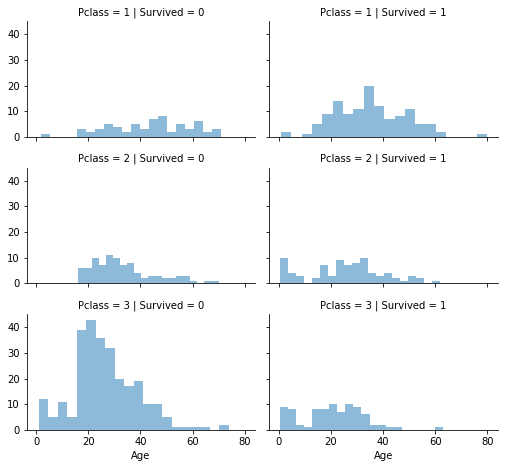

In [28]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


* This shows that Passenger in Pclass 1 has more survival rate irrespective of thier Age
* The Passenger in Pclass 3 has the highest number of those that do not survived.


##### Examining the relationship between Embarked, Survived, sex and Fare.

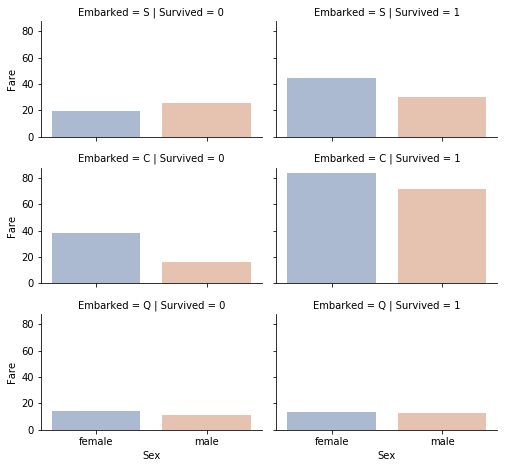

In [29]:
# let examine the correlation between embarked,sex and fare
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, palette='deep')
grid.add_legend()


* The above shows that passengers who paid more has a higher survival rate despite the sex and irrespective of the port they embark from.

* This shows that Passenger with high fare appears to embarked through port c. and also thier appears to be high survival rate for passengers that embarked through port c.

#### Examining the relationship between Embarked, Pclass, survived and sex

/home/lawani/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


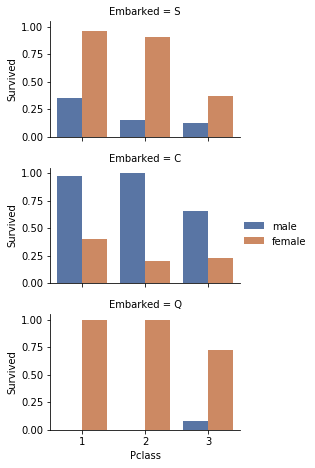

In [30]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Pclass', 'Survived', 'Sex', ci=None, palette='deep')
grid.add_legend()


#### from the above plot :
* The males has a higher survival that embark through port C than the females in respective of the class.
* female Passengers that embark  through that port  S and port Q has high survival rate than the males.



### Let examine the relationship of Parch and survived.

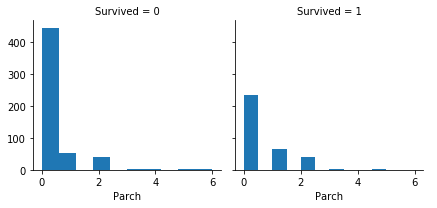

In [31]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Parch')
grid.add_legend()

* This shows most of the passenger were not on aboard on the  titanic with their parents/children



### Examining the relationship of SibSp with survived

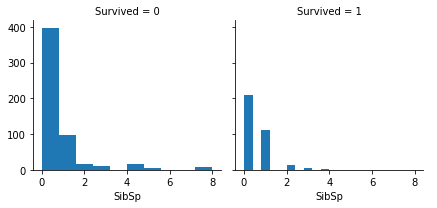

In [32]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'SibSp')
grid.add_legend()


* The shows that most of the passengers were not aboard with their siblings/spouse

#### Feature Engineering And Data Cleaning
* let start by dropping features that may not be relevant to our analysis - 
  * Cabin has alot of missing value above 70%
  * the passenger id should drop it is does not tell anything about those that survived
  * The ticket id should also be drop.

In [33]:


train = train.drop(['Ticket','Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 10) (418, 9) (891, 10) (418, 9)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [34]:
# displaying the rows that has missing values
train[train.isnull().any(axis=1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,146.5208,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,7.8958,C


#### Creating new feature extracting from existing
* Extracting title from the Name features

In [35]:
for dataset in combine:
    dataset['Title'] = dataset.Name .str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])
    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [36]:
train[['Title', 'Age']].groupby(['Title'], as_index=False).mean()


,Title,Age
0,Capt,70.000000
1,Col,58.000000
2,Countess,33.000000
3,Don,40.000000
4,Dr,42.000000
5,Jonkheer,38.000000
6,Lady,48.000000
7,Major,48.500000
8,Master,4.574167
9,Miss,21.773973


Some titles above are sparse, hence we can group them together

In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Observation :
   * the male children has lower survival rate than the female childere
   * the females with title mrs has a high survival rate than the male wih title mr.
   * The children, and the women with title mrs has a high survival rate

In [38]:
train[['Title', 'Age']].groupby(['Title'], as_index=False).mean()


,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,Rare,45.545455


In [39]:


for dataset in combine:
    dataset['Age_fill'] = 0
    dataset.loc[dataset['Title'] == 'Rare', 'Age_fill'] = 45.5   
    dataset.loc[dataset['Title'] == 'Master', 'Age_fill'] = 4.6    
    dataset.loc[dataset['Title'] == 'Miss', 'Age_fill'] = 21.8
    dataset.loc[dataset['Title'] == 'Mr', 'Age_fill'] = 32.4
    dataset.loc[dataset['Title'] == 'Mrs', 'Age_fill'] = 35.8



In [40]:
#fill missing value for AGe
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age_fill'])

In [41]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
Age_fill       0
dtype: int64

In [42]:
print('Before conversion')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Before conversion


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


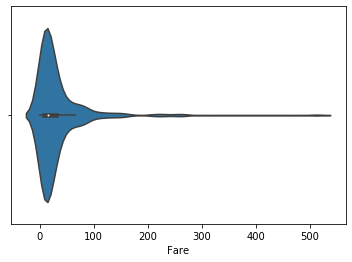

In [43]:
# Checking for outlier in the feature
sns.violinplot('Fare', data=train)

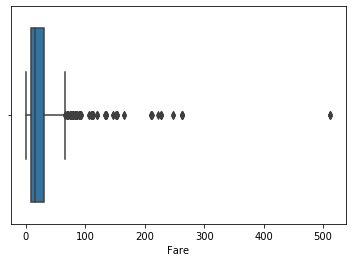

In [44]:
sns.boxplot('Fare', data=train)

* Their appears to presence of an outlier in the fare feature.
let examine the 5 largest fare

In [45]:
train.Fare.sort_values(ascending=False).head(3)

679    512.3292
258    512.3292
737    512.3292
Name: Fare, dtype: float64

In [46]:
# Displaying the rows of Passengers that Pays the highest fare
train[train.Fare == train.Fare.max()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_fill
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C,Miss,21.8
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C,Mr,32.4
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C,Mr,32.4


* from the above the three passenger that pays the highest fare embarked at port c recall that we have high survival rate in port c.
* it is important to deal with this outliers.

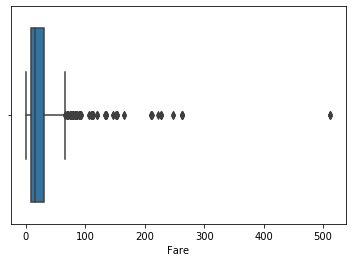

In [47]:
sns.boxplot(train.Fare)

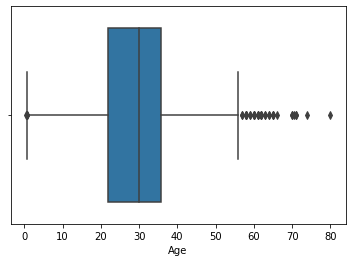

In [48]:
sns.boxplot('Age', data=train)


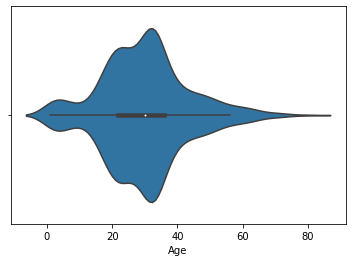

In [49]:
sns.violinplot('Age', data=train)

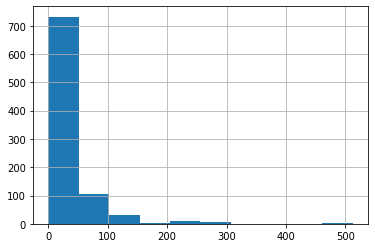

In [50]:
train.Fare.hist()

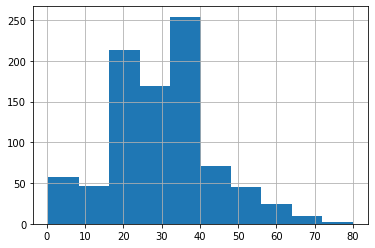

In [51]:
train.Age.hist()

In [52]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
Age_fill       float64
dtype: object

In [53]:
# dropping features that may not be intuitive for our model
train_df = train.drop(['Parch', 'SibSp','Title','Age_fill','Name','PassengerId' ], axis=1, inplace=True)
test_df = test.drop(['Parch', 'SibSp','Age_fill','Name','Title','PassengerId'], axis=1, inplace=True)


In [54]:
# completing the embarked feature
freq_port = train.Embarked.dropna().mode()[0]
print(freq_port)

train['Embarked'] = train['Embarked'].fillna(freq_port)

test['Embarked'] = test['Embarked'].fillna(freq_port)
        

S


In [55]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

train['Fare'].fillna(train['Fare'].dropna().median(), inplace=True)






In [56]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [57]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [58]:
train.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

#### Converting categorical to numerical values

In [59]:
#creating dummmy variable
abt = pd.get_dummies(train, columns=['Embarked','Sex'])

In [60]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

In [61]:
train.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

In [80]:
print((abt.columns))

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')


In [63]:
abt.dtypes

Survived        int64
Pclass          int64
Age           float64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_female      uint8
Sex_male        uint8
dtype: object

## Model training and Evaluation

In [64]:
y = abt.Survived

# create separate object for input features
X = abt.drop('Survived', axis=1)


In [65]:
# using train_test_split( function in sklearn.
# it split the dataframe into randomized subsets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

print( len(X_train), len(X_test), len(y_train), len(y_test))

712 179 712 179


In [66]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#first , subtract the mean then divide by the std.
# standaridize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()
# for the test set
X_test_new = (X_test - X_train.mean()) / X_train.std()

#summary statictics of X_train_new
X_train_new.describe()

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.539,-2.166,-0.658,-0.472,-0.300,-1.662,-0.749,-1.334
25%,-1.539,-0.586,-0.499,-0.472,-0.300,-1.662,-0.749,-1.334
50%,0.828,0.021,-0.367,-0.472,-0.300,0.601,-0.749,0.749
75%,0.828,0.449,-0.031,-0.472,-0.300,0.601,1.334,0.749
max,0.828,3.717,9.614,2.114,3.324,0.601,1.334,0.749


In [69]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier





logreg = LogisticRegression()
logreg.fit(X_train_new, y_train)
Y_pred = logreg.predict(X_test_new)
acc_log = round(logreg.score(X_train_new, y_train) * 100, 2)
acc_log

78.79

In [70]:
svc = SVC()
svc.fit(X_train_new, y_train)
Y_pred = svc.predict(X_test_new)
acc_svc = round(svc.score(X_train_new, y_train) * 100, 2)
acc_svc


82.58

In [72]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_new, y_train)
Y_pred = knn.predict(X_test_new)
acc_knn = round(knn.score(X_train_new, y_train) * 100, 2)
acc_knn

88.9

In [73]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_new, y_train)
Y_pred = gaussian.predict(X_test_new)
acc_gaussian = round(gaussian.score(X_train_new, y_train) * 100, 2)
acc_gaussian


77.25

In [74]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_new, y_train)
Y_pred = decision_tree.predict(X_test_new)
acc_decision_tree = round(decision_tree.score(X_train_new, y_train) * 100, 2)
acc_decision_tree


98.17

In [75]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_new, y_train)
Y_pred = random_forest.predict(X_test_new)
random_forest.score(X_train_new, y_train)
acc_random_forest = round(random_forest.score(X_train_new, y_train) * 100, 2)
acc_random_forest


98.17

In [76]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train_new, y_train)
Y_pred = sgd.predict(X_test_new)
acc_sgd = round(sgd.score(X_train_new, y_train) * 100, 2)
acc_sgd

79.21

In [77]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_new, y_train)
Y_pred = linear_svc.predict(X_test_new)
acc_linear_svc = round(linear_svc.score(X_train_new, y_train) * 100, 2)
acc_linear_svc


/home/lawani/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.93

In [78]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train_new, y_train)
Y_pred = perceptron.predict(X_test_new)
acc_perceptron = round(perceptron.score(X_train_new, y_train) * 100, 2)
acc_perceptron

56.18

In [79]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,98.170
8,Decision Tree,98.170
1,KNN,88.900
0,Support Vector Machines,82.580
6,Stochastic Gradient Decent,79.210
7,Linear SVC,78.930
2,Logistic Regression,78.790
4,Naive Bayes,77.250
5,Perceptron,56.180


it appears from the above that Random Forest and Discision tree has highest accuracy and this is follow by KNN. This will be use in our final prediction on the test set.